# Operating Performance - Airport Commercial Indicators
## Project Introduction to Data Science - CAP 394 INPE - Lenice Mirian
### Satisfaction Survey (Source: SAC - Civil Aviation Secretariat)

### Define libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
from statsmodels.graphics.mosaicplot import mosaic
import pandas as pd
import bokeh

### The data has been downloaded and saved to a local folder where it can be obtained from: https://horus.labtrans.ufsc.br/gerencial/#DesempenhoOperacional/ResultadosGerais
### Data download in July 31, 2019
### Last page refesh in March 31, 2019
### Collection Period: May 29, 2013 to March 30, 2019
### All Search Airports (21 airports)
###  Airport Commercial Indicators

### In Brazil, a permanent survey is carried out by the Civil Aviation Secretariat - SAC (2019), with the purpose of measuring the satisfaction of the passengers of the 20 main Brazilian airports. The evaluated criteria include check-in, migratory and customs control, security inspection, commercial facilities, airport environment, boarding and landing services. The results contribute to identify challenges, improve competitiveness and reveal the evolution of the terminals evaluated.

### Import CSV file

In [2]:
import csv

df = pd.read_csv("Data\\dados.csv", sep=';') 
df

C:\Users\lemir\.conda\envs\testefuzzy\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (13,76,77,79,82,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Linha,IcaoAerodromo,NomeAerodromo,Processo,SiglaAeroporto,Terminal,DataDaColeta,MesDaColeta,HorarioDoInicioDaColeta,HorarioDoFimDaColeta,...,RendaDoEntrevistado,ViajandoSozinho,NumeroDeAcompanhantes,MotivoDaViagem,OutrosMotivosDeViagem,QuantDeViagensPartindoDesseAeroporto,FrequenciaDeViagem,TempoDeAntecedenciaDeChegadaParaOVoo,TempoDeEsperaEntreOsVoos,DataAtualizacao
0,1,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:45,14:50,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
1,2,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:40,14:45,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
2,3,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:05,14:10,...,NaN,NaN,NaN,Negócio,NaN,NaN,3 a 5,30min a 1h,NaN,31/03/2019
3,4,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,13:50,13:55,...,NaN,NaN,NaN,Lazer,NaN,NaN,Mais de 5,30min a 1h,NaN,31/03/2019
4,5,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,13:45,13:50,...,NaN,NaN,NaN,Lazer,NaN,NaN,Mais de 5,1h e 30min a 2h,NaN,31/03/2019
5,6,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,13:40,13:45,...,NaN,NaN,NaN,Negócio,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
6,7,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:20,14:25,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
7,8,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:35,14:40,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
8,9,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:25,14:30,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
9,10,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:15,14:20,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019


### Creating a list from a dataframe

In [3]:
dados=list(df)
print(dados)

['Linha', 'IcaoAerodromo', 'NomeAerodromo', 'Processo', 'SiglaAeroporto', 'Terminal', 'DataDaColeta', 'MesDaColeta', 'HorarioDoInicioDaColeta', 'HorarioDoFimDaColeta', 'CiaAerea', 'NumeroDoVoo', 'TipoDeVoo', 'Conexao', 'FormaDeCheckin', 'TipoDeTransporteParaOAeroporto', 'MeioDeTransportePublicoUtilizado', 'OutroMeioDeTransportePublicoUtilizado', 'DisponibilidadeDeCarrinhosDeBagagem', 'DisponibilidadeDeMeioFio', 'TempoDeFilaNaInspecaoDeSegurança', 'RigorNaInspecaoDeSeguranca', 'CordialidadeDosFuncionariosDaInspecaoDeSeguranca', 'FacilidadeDeEncontrarOCaminhoNoAeroporto', 'PaineisDeInformacaoDeVoo', 'DistanciaCaminhadaNoTerminalDePassageiros', 'CordialidadeDosFuncionariosDoAeroporto', 'DisponibilidadeDeTomadas', 'QualidadeDaInternetWiFi', 'DisponibilidadeDeSanitarios', 'LimpezaDosSanitarios', 'DisponibilidadeDeAssentosNaSalaDeEmbarque', 'SensacaoDeProtecaoESeguranca', 'LimpezaGeralDoAeroporto', 'ConfortoNaSalaDeEmbarque', 'ConfortoTermicoDoAeroporto', 'ConfortoAcusticoDoAeroporto', 'Info

# DATABASE QUESTIONS
### 1 - Which airports have data for analysis?
### 2 - What is the profile of the passengers who answered the surveys regarding commercial indicators?
### 3 - What% did you consume in relation to the total sample for the analyzed period?
### 4 - What is the scale used in the survey?
### 5 - What is the profile of the passengers they have consumed (commercial indicators)?
### 6 - How satisfied are passengers by airport and by indicator analyzed?
### 7 - What is the metric used to check passenger satisfaction?

In [4]:
for linha in dados[0:]:
    print (linha)

Linha
IcaoAerodromo
NomeAerodromo
Processo
SiglaAeroporto
Terminal
DataDaColeta
MesDaColeta
HorarioDoInicioDaColeta
HorarioDoFimDaColeta
CiaAerea
NumeroDoVoo
TipoDeVoo
Conexao
FormaDeCheckin
TipoDeTransporteParaOAeroporto
MeioDeTransportePublicoUtilizado
OutroMeioDeTransportePublicoUtilizado
DisponibilidadeDeCarrinhosDeBagagem
DisponibilidadeDeMeioFio
TempoDeFilaNaInspecaoDeSegurança
RigorNaInspecaoDeSeguranca
CordialidadeDosFuncionariosDaInspecaoDeSeguranca
FacilidadeDeEncontrarOCaminhoNoAeroporto
PaineisDeInformacaoDeVoo
DistanciaCaminhadaNoTerminalDePassageiros
CordialidadeDosFuncionariosDoAeroporto
DisponibilidadeDeTomadas
QualidadeDaInternetWiFi
DisponibilidadeDeSanitarios
LimpezaDosSanitarios
DisponibilidadeDeAssentosNaSalaDeEmbarque
SensacaoDeProtecaoESeguranca
LimpezaGeralDoAeroporto
ConfortoNaSalaDeEmbarque
ConfortoTermicoDoAeroporto
ConfortoAcusticoDoAeroporto
InformacaoNasEsteirasDeRestituicaoDeBagagem
InstalacoesDeEstacionamentoDeVeiculos
CustoDoEstacionamento
QuantidadeEQu

In [5]:
# Show the first ten lines, or n = number of lines to display:
df.head(n=10)

,Linha,IcaoAerodromo,NomeAerodromo,Processo,SiglaAeroporto,Terminal,DataDaColeta,MesDaColeta,HorarioDoInicioDaColeta,HorarioDoFimDaColeta,...,RendaDoEntrevistado,ViajandoSozinho,NumeroDeAcompanhantes,MotivoDaViagem,OutrosMotivosDeViagem,QuantDeViagensPartindoDesseAeroporto,FrequenciaDeViagem,TempoDeAntecedenciaDeChegadaParaOVoo,TempoDeEsperaEntreOsVoos,DataAtualizacao
0,1,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:45,14:50,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
1,2,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:40,14:45,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
2,3,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:05,14:10,...,NaN,NaN,NaN,Negócio,NaN,NaN,3 a 5,30min a 1h,NaN,31/03/2019
3,4,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,13:50,13:55,...,NaN,NaN,NaN,Lazer,NaN,NaN,Mais de 5,30min a 1h,NaN,31/03/2019
4,5,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,13:45,13:50,...,NaN,NaN,NaN,Lazer,NaN,NaN,Mais de 5,1h e 30min a 2h,NaN,31/03/2019
5,6,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,13:40,13:45,...,NaN,NaN,NaN,Negócio,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
6,7,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:20,14:25,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
7,8,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:35,14:40,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
8,9,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:25,14:30,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
9,10,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:15,14:20,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019


In [6]:
# Displays by default the last 5 rows of the DataFrame:
df.tail()

,Linha,IcaoAerodromo,NomeAerodromo,Processo,SiglaAeroporto,Terminal,DataDaColeta,MesDaColeta,HorarioDoInicioDaColeta,HorarioDoFimDaColeta,...,RendaDoEntrevistado,ViajandoSozinho,NumeroDeAcompanhantes,MotivoDaViagem,OutrosMotivosDeViagem,QuantDeViagensPartindoDesseAeroporto,FrequenciaDeViagem,TempoDeAntecedenciaDeChegadaParaOVoo,TempoDeEsperaEntreOsVoos,DataAtualizacao
431839,431840,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,SBMO,1,23/03/2019,MARÇO,19:00,19:01,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31/03/2019
431840,431841,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,SBMO,1,23/03/2019,MARÇO,19:02,19:03,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31/03/2019
431841,431842,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,SBMO,1,23/03/2019,MARÇO,19:05,19:05,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31/03/2019
431842,431843,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,SBMO,1,30/03/2019,MARÇO,19:02,19:02,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31/03/2019
431843,431844,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,SBMO,1,30/03/2019,MARÇO,19:04,19:05,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31/03/2019


In [7]:
# Description of Index
df.index

RangeIndex(start=0, stop=431844, step=1)

## Define which variables will be used in this search

## Airport Data:  
### IcaoAerodromo / NomeAerodromo / Processo / Terminal / DataDaColeta / CiaAerea / NumeroDoVoo / TipoDeVoo / Conexao

## Commercial Indicators:
### QuantidadeEQualidadeDeLanchonetesRestaurantes / ValorDosProdutosDeLanchonetesRestaurantes / TempoDeFilaNasLanchonetesRestaurantes / CordialidadeDosFuncionariosDeLanchonetesRestaurantes / QuantidadeEQualidadeDeEstabelecimentosComerciais / ValorDosProdutosComerciais / TempoDeFilaNosEstabelecimentosComerciais / CordialidadeDosFuncionariosDoComercio

## Passenger Profile:
### NacionalidadeDoEntrevistado / GeneroDoEntrevistado / Escolaridade / ProfissaoDoEntrevistado / RendaDoEntrevistado / ViajandoSozinho / NumeroDeAcompanhantes / MotivoDaViagem / OutrosMotivosDeViagem / QuantDeViagensPartindoDesseAeroporto / FrequenciaDeViagem / TempoDeAntecedenciaDeChegadaParaOVoo / TempoDeEsperaEntreOsVoos

In [8]:
#Removing Columns
newdf = df.drop(['FormaDeCheckin','SiglaAeroporto', 'MesDaColeta', 'HorarioDoInicioDaColeta', 'Linha',
                 'HorarioDoFimDaColeta', 'TipoDeTransporteParaOAeroporto', 'MeioDeTransportePublicoUtilizado',
                 'OutroMeioDeTransportePublicoUtilizado', 'DisponibilidadeDeCarrinhosDeBagagem', 'DisponibilidadeDeMeioFio',
                 'TempoDeFilaNaInspecaoDeSegurança', 'RigorNaInspecaoDeSeguranca','CordialidadeDosFuncionariosDaInspecaoDeSeguranca',
                'FacilidadeDeEncontrarOCaminhoNoAeroporto', 'PaineisDeInformacaoDeVoo','DistanciaCaminhadaNoTerminalDePassageiros',
                 'CordialidadeDosFuncionariosDoAeroporto','DisponibilidadeDeTomadas','QualidadeDaInternetWiFi','DisponibilidadeDeSanitarios',
                'LimpezaDosSanitarios', 'DisponibilidadeDeAssentosNaSalaDeEmbarque','SensacaoDeProtecaoESeguranca','LimpezaGeralDoAeroporto', 
                 'DataAtualizacao', 'InformacaoNasEsteirasDeRestituicaoDeBagagem', 'InstalacoesDeEstacionamentoDeVeiculos', 
                 'CustoDoEstacionamento', 'DisponibilidadeDeBancosCaixasEletronicosCasasDeCambio',  'QualidadeSalaVip',
                 'TempoDeFilaNoCheckinAutoatendimento', 'TempoDeFilaNoCheckinGuiche','EficienciaDosFuncionariosDoCheckin',
                 'CordialidadeDosFuncionariosDoCheckin','FacilidadeParaRealizarConexoes', 'VelocidadeDaRestituicaoDeBagagem', 
                 'IntegridadeDaBagagem', 'TempoDeFilaNaEmigracao','CordialidadeDosFuncionariosDaEmigracao', 'TempoDeFilaNaImigracao',
                 'CordialidadeDosFuncionariosDaImigracao', 'TempoDeFilaDaAduana', 'CordialidadeDoFuncionarioDaAduana', 'TransportePublico',
                 'DisponibilidadeDeTaxi', 'SatisfacaoGeralDoAeroporto','ConfiabilidadeDaInspecaoDeSeguranca',
                 'DisponibilidadeDeVagasNoEstacionamentoDeVeiculos','QualidadeDaInformacaoPrestadaPelaCiaAerea',
                 'QualidadeDaAcessibilidadeDoAeroporto','DisponibilidadeDeVagasReservadasNoEstacionamento',
                 'DisponibilidadeDeAssentosReservadosParaPessoasComCadeiraDeRodas','QualidadeDoMetodoDeDesembarque', 'Conexao', 'NumeroDoVoo', 'ConfortoNaSalaDeEmbarque',
       'ConfortoTermicoDoAeroporto', 'ConfortoAcusticoDoAeroporto', 'PossuiDeficiencia', 'SolicitouAssistenciaEspecial', 'MetodoDeDesembarqueUtilizado', 'TempoDeEsperaEntreOsVoos'], axis=1)
newdf

,IcaoAerodromo,NomeAerodromo,Processo,Terminal,DataDaColeta,CiaAerea,TipoDeVoo,QuantidadeEQualidadeDeLanchonetesRestaurantes,ValorDosProdutosDeLanchonetesRestaurantes,TempoDeFilaNasLanchonetesRestaurantes,...,Escolaridade,ProfissaoDoEntrevistado,RendaDoEntrevistado,ViajandoSozinho,NumeroDeAcompanhantes,MotivoDaViagem,OutrosMotivosDeViagem,QuantDeViagensPartindoDesseAeroporto,FrequenciaDeViagem,TempoDeAntecedenciaDeChegadaParaOVoo
0,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h
1,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,4.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h
2,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,3.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,Negócio,NaN,NaN,3 a 5,30min a 1h
3,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Lazer,NaN,NaN,Mais de 5,30min a 1h
4,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,Lazer,NaN,NaN,Mais de 5,1h e 30min a 2h
5,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Negócio,NaN,NaN,0 a 2,1h e 30min a 2h
6,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h
7,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h
8,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h
9,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,5.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h


In [9]:
newdf.columns 

Index(['IcaoAerodromo', 'NomeAerodromo', 'Processo', 'Terminal',
       'DataDaColeta', 'CiaAerea', 'TipoDeVoo',
       'QuantidadeEQualidadeDeLanchonetesRestaurantes',
       'ValorDosProdutosDeLanchonetesRestaurantes',
       'TempoDeFilaNasLanchonetesRestaurantes',
       'CordialidadeDosFuncionariosDeLanchonetesRestaurantes',
       'QuantidadeEQualidadeDeEstabelecimentosComerciais',
       'ValorDosProdutosComerciais',
       'TempoDeFilaNosEstabelecimentosComerciais',
       'CordialidadeDosFuncionariosDoComercio', 'NacionalidadeDoEntrevistado',
       'GeneroDoEntrevistado', 'Escolaridade', 'ProfissaoDoEntrevistado',
       'RendaDoEntrevistado', 'ViajandoSozinho', 'NumeroDeAcompanhantes',
       'MotivoDaViagem', 'OutrosMotivosDeViagem',
       'QuantDeViagensPartindoDesseAeroporto', 'FrequenciaDeViagem',
       'TempoDeAntecedenciaDeChegadaParaOVoo'],
      dtype='object')

In [10]:
newdf["MotivoDaViagem"].value_counts(dropna=False)

Lazer                185462
NaN                  123148
Negócio               94933
Outro                 19613
Lazer e Negócio        5778
 Lazer                 1946
 Negócio                591
 Lazer e Negócio        138
Lazer e Negócio         106
 Outro                  105
Lazer e negócio          22
Outros                    1
lazer                     1
Name: MotivoDaViagem, dtype: int64

In [11]:
newdf["OutrosMotivosDeViagem"].value_counts(dropna=False)

NaN                           396311
                               19748
ESTUDOS                         2093
ESTUDO                          1386
FAMILIAR                         927
SAÚDE                            916
Estudos                          881
RETORNO                          764
Saúde                            716
SAUDE                            643
Estudo                           642
Retorno                          446
Familiar                         442
MUDANÇA                          316
CONGRESSO                        237
VISITAR FAMILIA                  202
VOLTANDO PARA CASA               190
Mudança                          169
FALECIMENTO                      158
Voltando para casa               152
CONCURSO                         132
MUDANCA                          117
Congresso                        111
PESSOAL                          104
 Estudos                         101
ESTUDOS                           99
PARTICULAR                        99
M

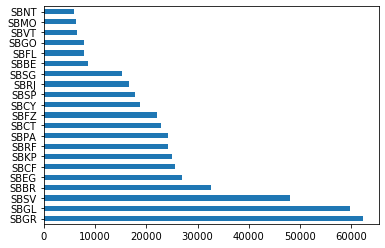

In [12]:
axis0 = pd.value_counts(newdf["ValorDosProdutosDeLanchonetesRestaurantes"].values, sort=True)
axis1 = pd.value_counts(newdf["IcaoAerodromo"].values, sort=True)
axis0.plot.barh()
axis1.plot.barh()

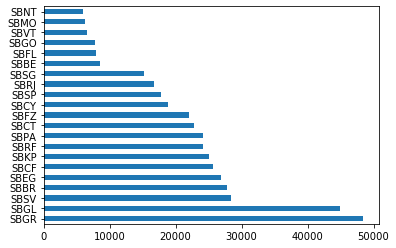

In [13]:
axis0 = pd.value_counts(newdf["CordialidadeDosFuncionariosDeLanchonetesRestaurantes"].values, sort=True)
axis1 = pd.value_counts(newdf["IcaoAerodromo"].values, sort=True)
axis0.plot.barh()
axis1.plot.barh()

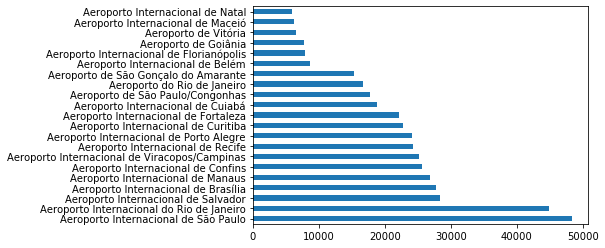

In [14]:
# Plot the chart of the chosen column
newdf["NomeAerodromo"].value_counts().plot.barh()

In [15]:
newdf.dtypes

IcaoAerodromo                                            object
NomeAerodromo                                            object
Processo                                                 object
Terminal                                                  int64
DataDaColeta                                             object
CiaAerea                                                 object
TipoDeVoo                                                object
QuantidadeEQualidadeDeLanchonetesRestaurantes           float64
ValorDosProdutosDeLanchonetesRestaurantes               float64
TempoDeFilaNasLanchonetesRestaurantes                   float64
CordialidadeDosFuncionariosDeLanchonetesRestaurantes    float64
QuantidadeEQualidadeDeEstabelecimentosComerciais        float64
ValorDosProdutosComerciais                              float64
TempoDeFilaNosEstabelecimentosComerciais                float64
CordialidadeDosFuncionariosDoComercio                   float64
NacionalidadeDoEntrevistado             

In [16]:
data = {'ValorDosProdutosDeLanchonetesRestaurantes':  newdf["ValorDosProdutosDeLanchonetesRestaurantes"],
        'IcaoAerodromo': newdf["IcaoAerodromo"]}

dfa = pd.DataFrame(data)

grouped = dfa.groupby('IcaoAerodromo')

for name, group in grouped:
   print (name)
   print (group)

SBBE
        ValorDosProdutosDeLanchonetesRestaurantes IcaoAerodromo
253150                                        NaN          SBBE
253151                                        NaN          SBBE
253152                                        NaN          SBBE
253153                                        NaN          SBBE
253154                                        NaN          SBBE
253155                                        NaN          SBBE
253156                                        NaN          SBBE
253157                                        NaN          SBBE
253158                                        NaN          SBBE
253159                                        NaN          SBBE
253160                                        NaN          SBBE
253161                                        NaN          SBBE
253162                                        NaN          SBBE
253163                                        NaN          SBBE
253164                             

        ValorDosProdutosDeLanchonetesRestaurantes IcaoAerodromo
144488                                        NaN          SBRJ
144489                                        NaN          SBRJ
144490                                        NaN          SBRJ
144491                                        NaN          SBRJ
144492                                        NaN          SBRJ
144493                                        NaN          SBRJ
144494                                        NaN          SBRJ
144495                                        NaN          SBRJ
144496                                        NaN          SBRJ
144497                                        NaN          SBRJ
144498                                        NaN          SBRJ
144499                                        NaN          SBRJ
144500                                        NaN          SBRJ
144501                                        NaN          SBRJ
144502                                  

In [17]:
dataa = {'ValorDosProdutosDeLanchonetesRestaurantes':  newdf["ValorDosProdutosDeLanchonetesRestaurantes"],
        'IcaoAerodromo': newdf["IcaoAerodromo"]}
dfaa = pd.DataFrame(dataa)

grouped = dfaa.groupby('IcaoAerodromo')
print (grouped.get_group('SBGR'))

       ValorDosProdutosDeLanchonetesRestaurantes IcaoAerodromo
31077                                        NaN          SBGR
31078                                        NaN          SBGR
31079                                        NaN          SBGR
31080                                        NaN          SBGR
31081                                        NaN          SBGR
31082                                        NaN          SBGR
31083                                        3.0          SBGR
31084                                        2.0          SBGR
31085                                        3.0          SBGR
31086                                        NaN          SBGR
31087                                        3.0          SBGR
31088                                        NaN          SBGR
31089                                        NaN          SBGR
31090                                        1.0          SBGR
31091                                        3.0       

In [18]:
dataaa = {'ValorDosProdutosDeLanchonetesRestaurantes':  newdf["ValorDosProdutosDeLanchonetesRestaurantes"],
        'IcaoAerodromo': newdf["IcaoAerodromo"]}
dfaaa = pd.DataFrame(dataaa)

grouped = dfaaa.groupby('IcaoAerodromo')
print (grouped['ValorDosProdutosDeLanchonetesRestaurantes'].agg([np.size, np.mean, np.std, np.var]))

                  size      mean       std       var
IcaoAerodromo                                       
SBBE            8581.0  2.941292  1.224436  1.499244
SBBR           27734.0  2.217860  1.153996  1.331707
SBCF           25699.0  2.264898  1.177074  1.385504
SBCT           22823.0  2.408671  1.204980  1.451976
SBCY           18778.0  2.356454  1.132472  1.282492
SBEG           26904.0  2.759863  1.136875  1.292484
SBFL            7902.0  2.897716  1.198724  1.436939
SBFZ           22090.0  2.430349  1.090228  1.188598
SBGL           44940.0  2.653388  1.183797  1.401375
SBGO            7812.0  2.695876  1.108683  1.229177
SBGR           48340.0  2.229788  1.186498  1.407777
SBKP           25114.0  2.585759  1.192302  1.421583
SBMO            6209.0  3.147311  1.152447  1.328133
SBNT            5963.0  2.607182  1.363147  1.858169
SBPA           24156.0  2.589872  1.079615  1.165568
SBRF           24189.0  2.693786  1.225085  1.500833
SBRJ           16710.0  2.064484  1.150713  1.

In [19]:
data10 = {'ValorDosProdutosDeLanchonetesRestaurantes':  newdf["ValorDosProdutosDeLanchonetesRestaurantes"],
        'NomeAerodromo': newdf["NomeAerodromo"]}
df10 = pd.DataFrame(data10)

grouped = df10.groupby('NomeAerodromo')
print (grouped['ValorDosProdutosDeLanchonetesRestaurantes'].agg([np.mean]))

                                                   mean
NomeAerodromo                                          
Aeroporto Internacional de Belém               2.941292
Aeroporto Internacional de Brasília            2.217860
Aeroporto Internacional de Confins             2.264898
Aeroporto Internacional de Cuiabá              2.356454
Aeroporto Internacional de Curitiba            2.408671
Aeroporto Internacional de Florianópolis       2.897716
Aeroporto Internacional de Fortaleza           2.430349
Aeroporto Internacional de Maceió              3.147311
Aeroporto Internacional de Manaus              2.759863
Aeroporto Internacional de Natal               2.607182
Aeroporto Internacional de Porto Alegre        2.589872
Aeroporto Internacional de Recife              2.693786
Aeroporto Internacional de Salvador            2.616071
Aeroporto Internacional de São Paulo           2.229788
Aeroporto Internacional de Viracopos/Campinas  2.585759
Aeroporto Internacional do Rio de Janeiro      2

In [20]:
data11 = {'QuantidadeEQualidadeDeLanchonetesRestaurantes':  newdf["QuantidadeEQualidadeDeLanchonetesRestaurantes"],
        'NomeAerodromo': newdf["NomeAerodromo"]}
df11 = pd.DataFrame(data11)

grouped = df11.groupby('NomeAerodromo')
print (grouped['QuantidadeEQualidadeDeLanchonetesRestaurantes'].agg([np.mean]))

                                                   mean
NomeAerodromo                                          
Aeroporto Internacional de Belém               3.614112
Aeroporto Internacional de Brasília            3.544114
Aeroporto Internacional de Confins             3.433665
Aeroporto Internacional de Cuiabá              3.060293
Aeroporto Internacional de Curitiba            3.646510
Aeroporto Internacional de Florianópolis       3.891561
Aeroporto Internacional de Fortaleza           3.704884
Aeroporto Internacional de Maceió              3.693716
Aeroporto Internacional de Manaus              3.247752
Aeroporto Internacional de Natal               3.261817
Aeroporto Internacional de Porto Alegre        3.560409
Aeroporto Internacional de Recife              3.848048
Aeroporto Internacional de Salvador            3.706053
Aeroporto Internacional de São Paulo           3.441536
Aeroporto Internacional de Viracopos/Campinas  3.425508
Aeroporto Internacional do Rio de Janeiro      3

In [21]:
data12 = {'TempoDeFilaNasLanchonetesRestaurantes':  newdf["TempoDeFilaNasLanchonetesRestaurantes"],
        'NomeAerodromo': newdf["NomeAerodromo"]}
df12 = pd.DataFrame(data12)

grouped = df12.groupby('NomeAerodromo')
print (grouped['TempoDeFilaNasLanchonetesRestaurantes'].agg([np.mean]))


                                                   mean
NomeAerodromo                                          
Aeroporto Internacional de Belém                    NaN
Aeroporto Internacional de Brasília            3.731242
Aeroporto Internacional de Confins             3.658805
Aeroporto Internacional de Cuiabá              3.343062
Aeroporto Internacional de Curitiba            4.090170
Aeroporto Internacional de Florianópolis            NaN
Aeroporto Internacional de Fortaleza           3.937285
Aeroporto Internacional de Maceió                   NaN
Aeroporto Internacional de Manaus              3.342831
Aeroporto Internacional de Natal               2.739550
Aeroporto Internacional de Porto Alegre        3.861735
Aeroporto Internacional de Recife              3.764080
Aeroporto Internacional de Salvador            3.694444
Aeroporto Internacional de São Paulo           3.329941
Aeroporto Internacional de Viracopos/Campinas  3.745837
Aeroporto Internacional do Rio de Janeiro      3

In [22]:
data13 = {'CordialidadeDosFuncionariosDeLanchonetesRestaurantes':  newdf["CordialidadeDosFuncionariosDeLanchonetesRestaurantes"],
        'NomeAerodromo': newdf["NomeAerodromo"]}
df13 = pd.DataFrame(data13)

grouped = df13.groupby('NomeAerodromo')
print (grouped['CordialidadeDosFuncionariosDeLanchonetesRestaurantes'].agg([np.mean]))

                                                   mean
NomeAerodromo                                          
Aeroporto Internacional de Belém                    NaN
Aeroporto Internacional de Brasília            3.971873
Aeroporto Internacional de Confins             3.980190
Aeroporto Internacional de Cuiabá              3.537664
Aeroporto Internacional de Curitiba            4.127422
Aeroporto Internacional de Florianópolis            NaN
Aeroporto Internacional de Fortaleza           4.117490
Aeroporto Internacional de Maceió                   NaN
Aeroporto Internacional de Manaus              3.554132
Aeroporto Internacional de Natal               3.181518
Aeroporto Internacional de Porto Alegre        3.913751
Aeroporto Internacional de Recife              3.981440
Aeroporto Internacional de Salvador            3.855409
Aeroporto Internacional de São Paulo           3.489759
Aeroporto Internacional de Viracopos/Campinas  3.990814
Aeroporto Internacional do Rio de Janeiro      3

In [23]:
data14 = {'QuantidadeEQualidadeDeEstabelecimentosComerciais':  newdf["QuantidadeEQualidadeDeEstabelecimentosComerciais"],
        'NomeAerodromo': newdf["NomeAerodromo"]}
df14 = pd.DataFrame(data14)

grouped = df14.groupby('NomeAerodromo')
print (grouped['QuantidadeEQualidadeDeEstabelecimentosComerciais'].agg([np.mean]))

                                                   mean
NomeAerodromo                                          
Aeroporto Internacional de Belém               3.912264
Aeroporto Internacional de Brasília            3.329081
Aeroporto Internacional de Confins             3.453861
Aeroporto Internacional de Cuiabá              2.731682
Aeroporto Internacional de Curitiba            3.750463
Aeroporto Internacional de Florianópolis       3.907438
Aeroporto Internacional de Fortaleza           3.730955
Aeroporto Internacional de Maceió              3.938202
Aeroporto Internacional de Manaus              3.260345
Aeroporto Internacional de Natal               3.229109
Aeroporto Internacional de Porto Alegre        3.579691
Aeroporto Internacional de Recife              3.855735
Aeroporto Internacional de Salvador            3.753643
Aeroporto Internacional de São Paulo           3.514270
Aeroporto Internacional de Viracopos/Campinas  3.223924
Aeroporto Internacional do Rio de Janeiro      3

In [24]:
data15 = {'ValorDosProdutosComerciais':  newdf["ValorDosProdutosComerciais"],
        'NomeAerodromo': newdf["NomeAerodromo"]}
df15 = pd.DataFrame(data15)

grouped = df15.groupby('NomeAerodromo')
print (grouped['ValorDosProdutosComerciais'].agg([np.mean]))

                                                   mean
NomeAerodromo                                          
Aeroporto Internacional de Belém               3.196926
Aeroporto Internacional de Brasília            2.139717
Aeroporto Internacional de Confins             2.537885
Aeroporto Internacional de Cuiabá              2.477051
Aeroporto Internacional de Curitiba            2.986671
Aeroporto Internacional de Florianópolis       3.306897
Aeroporto Internacional de Fortaleza           2.633718
Aeroporto Internacional de Maceió              3.167243
Aeroporto Internacional de Manaus              3.011648
Aeroporto Internacional de Natal               2.797151
Aeroporto Internacional de Porto Alegre        2.777508
Aeroporto Internacional de Recife              2.641892
Aeroporto Internacional de Salvador            2.732010
Aeroporto Internacional de São Paulo           2.461071
Aeroporto Internacional de Viracopos/Campinas  2.613633
Aeroporto Internacional do Rio de Janeiro      2

In [25]:
data16 = {'TempoDeFilaNosEstabelecimentosComerciais':  newdf["TempoDeFilaNosEstabelecimentosComerciais"],
        'NomeAerodromo': newdf["NomeAerodromo"]}
df16 = pd.DataFrame(data16)

grouped = df16.groupby('NomeAerodromo')
print (grouped['TempoDeFilaNosEstabelecimentosComerciais'].agg([np.mean]))

                                                   mean
NomeAerodromo                                          
Aeroporto Internacional de Belém                    NaN
Aeroporto Internacional de Brasília            3.925617
Aeroporto Internacional de Confins             3.718250
Aeroporto Internacional de Cuiabá              3.344477
Aeroporto Internacional de Curitiba            4.205503
Aeroporto Internacional de Florianópolis            NaN
Aeroporto Internacional de Fortaleza           4.015694
Aeroporto Internacional de Maceió                   NaN
Aeroporto Internacional de Manaus              3.555327
Aeroporto Internacional de Natal               3.581522
Aeroporto Internacional de Porto Alegre        4.048200
Aeroporto Internacional de Recife              3.988294
Aeroporto Internacional de Salvador            3.817418
Aeroporto Internacional de São Paulo           3.453730
Aeroporto Internacional de Viracopos/Campinas  3.778934
Aeroporto Internacional do Rio de Janeiro      3

In [26]:
data17 = {'CordialidadeDosFuncionariosDoComercio':  newdf["CordialidadeDosFuncionariosDoComercio"],
        'NomeAerodromo': newdf["NomeAerodromo"]}
df17 = pd.DataFrame(data17)

grouped = df17.groupby('NomeAerodromo')
print (grouped['CordialidadeDosFuncionariosDoComercio'].agg([np.mean]))

                                                   mean
NomeAerodromo                                          
Aeroporto Internacional de Belém                    NaN
Aeroporto Internacional de Brasília            4.097428
Aeroporto Internacional de Confins             3.995340
Aeroporto Internacional de Cuiabá              3.367583
Aeroporto Internacional de Curitiba            4.228070
Aeroporto Internacional de Florianópolis            NaN
Aeroporto Internacional de Fortaleza           4.182559
Aeroporto Internacional de Maceió                   NaN
Aeroporto Internacional de Manaus              3.680394
Aeroporto Internacional de Natal               3.754098
Aeroporto Internacional de Porto Alegre        4.126820
Aeroporto Internacional de Recife              4.085784
Aeroporto Internacional de Salvador            3.925659
Aeroporto Internacional de São Paulo           3.473668
Aeroporto Internacional de Viracopos/Campinas  3.962725
Aeroporto Internacional do Rio de Janeiro      4

In [27]:
#resumo das variáveis numéricas
newdf.describe()

,Terminal,QuantidadeEQualidadeDeLanchonetesRestaurantes,ValorDosProdutosDeLanchonetesRestaurantes,TempoDeFilaNasLanchonetesRestaurantes,CordialidadeDosFuncionariosDeLanchonetesRestaurantes,QuantidadeEQualidadeDeEstabelecimentosComerciais,ValorDosProdutosComerciais,TempoDeFilaNosEstabelecimentosComerciais,CordialidadeDosFuncionariosDoComercio
count,431844.000000,217724.000000,213228.000000,57328.000000,56889.000000,155514.000000,142246.000000,37987.000000,38358.000000
mean,1.363175,3.492569,2.442479,3.613435,3.831022,3.517941,2.618850,3.766973,3.891600
std,0.722714,1.133005,1.196581,1.042123,0.969354,1.102020,1.207922,0.914948,0.898755
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,3.000000,1.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000
50%,1.000000,4.000000,2.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000
75%,1.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000
max,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [28]:
pd.isnull(newdf)

,IcaoAerodromo,NomeAerodromo,Processo,Terminal,DataDaColeta,CiaAerea,TipoDeVoo,QuantidadeEQualidadeDeLanchonetesRestaurantes,ValorDosProdutosDeLanchonetesRestaurantes,TempoDeFilaNasLanchonetesRestaurantes,...,Escolaridade,ProfissaoDoEntrevistado,RendaDoEntrevistado,ViajandoSozinho,NumeroDeAcompanhantes,MotivoDaViagem,OutrosMotivosDeViagem,QuantDeViagensPartindoDesseAeroporto,FrequenciaDeViagem,TempoDeAntecedenciaDeChegadaParaOVoo
0,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,False,True,True,False,False
1,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,False,True,True,False,False
2,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,False,True,True,False,False
3,False,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,False,True,True,False,False
4,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,False,True,True,False,False
5,False,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,False,True,True,False,False
6,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,False,True,True,False,False
7,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,False,True,True,False,False
8,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,False,True,True,False,False
9,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,False,True,True,False,False


In [29]:
print(newdf[['ValorDosProdutosDeLanchonetesRestaurantes', 'Escolaridade']])

        ValorDosProdutosDeLanchonetesRestaurantes  \
0                                             2.0   
1                                             3.0   
2                                             5.0   
3                                             NaN   
4                                             1.0   
5                                             NaN   
6                                             1.0   
7                                             1.0   
8                                             1.0   
9                                             1.0   
10                                            1.0   
11                                            NaN   
12                                            NaN   
13                                            4.0   
14                                            4.0   
15                                            NaN   
16                                            NaN   
17                                            

In [30]:
import warnings
warnings.filterwarnings('ignore')


# criando um subset sem as linhas vazias para uma determinada coluna
newdf1=newdf.copy()
newdf1=newdf1.dropna(subset=["ValorDosProdutosDeLanchonetesRestaurantes"])
newdf1["ValorDosProdutosDeLanchonetesRestaurantes"].value_counts(dropna=False)

#print(newdf1['ValorDosProdutosDeLanchonetesRestaurantes'])
#newdf1['ValorDosProdutosDeLanchonetesRestaurantes'].shape

1.0    62190
3.0    59793
2.0    48134
4.0    32587
5.0    10524
Name: ValorDosProdutosDeLanchonetesRestaurantes, dtype: int64

In [31]:
#Save the new dataframe
#mport sys
#newdf.to_csv(sys.stdout, sep = '|')

In [32]:
newdf["MotivoDaViagem"].value_counts(dropna=False)

Lazer                185462
NaN                  123148
Negócio               94933
Outro                 19613
Lazer e Negócio        5778
 Lazer                 1946
 Negócio                591
 Lazer e Negócio        138
Lazer e Negócio         106
 Outro                  105
Lazer e negócio          22
Outros                    1
lazer                     1
Name: MotivoDaViagem, dtype: int64

In [33]:
novacoluna_motivo = newdf["MotivoDaViagem"].replace('Outros', 'OUTRO').replace('Outro', 'OUTRO').replace(' Outro ', 'OUTRO').replace('Lazer', 'LAZER').replace('lazer','LAZER').replace(' Lazer ','LAZER').replace('Negócio','NEGOCIO').replace(' Negócio ','NEGOCIO').replace('Lazer e Negócio', 'LAZER & NEGOCIO').replace(' Lazer e Negócio ', 'LAZER & NEGOCIO').replace('Lazer e Negócio ', 'LAZER & NEGOCIO').replace('Lazer e negócio','LAZER & NEGOCIO').value_counts(dropna=False)
novacoluna_motivo

LAZER              187409
NaN                123148
NEGOCIO             95524
OUTRO               19719
LAZER & NEGOCIO      6044
Name: MotivoDaViagem, dtype: int64

In [34]:
newdf["TempoDeAntecedenciaDeChegadaParaOVoo"].value_counts()

1h a 1h e 30min           34712
Mais de 3h                33737
1h e 30min a 2h           31845
2h a 2h e 30min           24552
2h e 30min a 3h           23771
02h31min até 03h00min     20271
01h01min até 01h30min     19569
Mais de 03h01min          17310
30min a 1h                17205
00h30min até 01h00min     16825
Mais de 03h01min          16253
02h01min até 02h30min     14545
01h31min até 02h00min     13924
01h31min até 02h00min     11829
Name: TempoDeAntecedenciaDeChegadaParaOVoo, dtype: int64

In [35]:
novacoluna_tempo_de_espera = newdf["TempoDeAntecedenciaDeChegadaParaOVoo"].replace('1h a 1h e 30min','1h até 1h30min').replace('01h01min até 01h30min','1h até 1h30min').replace('2h e 30min a 3h', '2h30min até 3h').replace('02h31min até 03h00min','2h30min até 3h').replace('Mais de 03h01min', 'Mais de 3h').replace('Mais de 03h01min ', 'Mais de 3h').replace('30min a 1h','30min até 1h').replace('00h30min até 01h00min', '30min até 1h').replace('2h a 2h e 30min', '2h até 2h30min').replace('02h01min até 02h30min', '2h até 2h30min').replace('1h e 30min a 2h', '1h30min até 2h').replace('01h31min até 02h00min ', '1h30min até 2h').replace('01h31min até 02h00min', '1h30min até 2h').value_counts()
novacoluna_tempo_de_espera

Mais de 3h        67300
1h30min até 2h    57598
1h até 1h30min    54281
2h30min até 3h    44042
2h até 2h30min    39097
30min até 1h      34030
Name: TempoDeAntecedenciaDeChegadaParaOVoo, dtype: int64

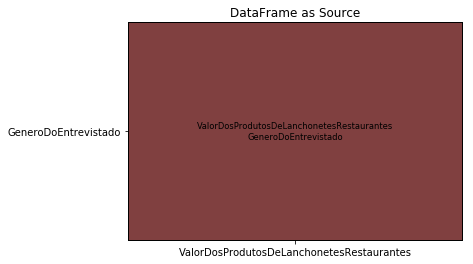

In [36]:
>>> gender = ['GeneroDoEntrevistado']
>>> satisfaction = ['ValorDosProdutosDeLanchonetesRestaurantes']
>>> data = pd.DataFrame({'GeneroDoEntrevistado': gender, 'ValorDosProdutosDeLanchonetesRestaurantes': satisfaction})
>>> mosaic(data, ['ValorDosProdutosDeLanchonetesRestaurantes', 'GeneroDoEntrevistado'], title='DataFrame as Source')
>>> plt.show()